In [ ]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from langgraph.graph import StateGraph,START,MessagesState
from dotenv import load_dotenv

In [7]:
load_dotenv()

True

In [9]:
model = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    task="text-generation"
)

llm = ChatHuggingFace(llm=model)

In [10]:
def call_model(state: MessagesState):
    response = llm.invoke(state['messages'])
    return {'messages':[response]}

In [11]:
builder = StateGraph(MessagesState)
builder.add_node("call_model",call_model)
builder.add_edge(START,"call_model")

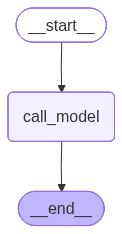

In [12]:
graph = builder.compile()
graph

In [13]:
graph.invoke({"messages":[{'role':'user','content':"hello my name is tushar"}]})

{'messages': [HumanMessage(content='hello my name is tushar', additional_kwargs={}, response_metadata={}, id='7745f262-084e-474e-abe9-78ca4c212e22'),
  AIMessage(content=" Hello Tushar! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 13, 'total_tokens': 33}, 'model_name': 'mistralai/Mistral-7B-Instruct-v0.2', 'system_fingerprint': '', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bb2b0-b511-7741-b142-bc7a8c7931cb-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 20, 'total_tokens': 33})]}

In [14]:
graph.invoke({"messages":[{'role':'user','content':"what is my name?"}]})

{'messages': [HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={}, id='82b0d2e6-3d25-4e5d-92fc-9371373c7955'),
  AIMessage(content=" I'm an artificial intelligence and don't have a name or a physical body. I'm here to help answer your questions to the best of my ability. If you have a specific question, feel free to ask and I'll do my best to provide an accurate and helpful response.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 10, 'total_tokens': 70}, 'model_name': 'mistralai/Mistral-7B-Instruct-v0.2', 'system_fingerprint': '', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bb2b0-f65a-7372-9045-8caa6e878c65-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 10, 'output_tokens': 60, 'total_tokens': 70})]}

In [15]:
def call_model(state: MessagesState):
    response = llm.invoke(state['messages'])
    return {'messages':[response]}

In [18]:
builder = StateGraph(MessagesState)
builder.add_node("call_model",call_model)
builder.add_edge(START,"call_model")

In [19]:
from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

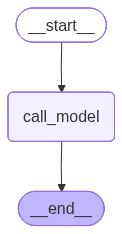

In [20]:
graph

In [21]:
config = {'configurable':{'thread_id':'thread-1'}}

In [22]:
graph.invoke({"messages":[{'role':'user','content':"hello my name is tushar"}]},config=config)

{'messages': [HumanMessage(content='hello my name is tushar', additional_kwargs={}, response_metadata={}, id='5c2890c0-cb54-490a-b318-9b0b97d4ed43'),
  AIMessage(content=" Hello Tushar! Nice to meet you. How can I help you today? Let me know if you have any specific questions or topics you'd like to discuss. I'm here to provide information and answer any queries you might have. Let me know if there's anything I can do for you!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 13, 'total_tokens': 77}, 'model_name': 'mistralai/Mistral-7B-Instruct-v0.2', 'system_fingerprint': '', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bb2b4-7c7a-7ce3-b219-73a290e302cc-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 64, 'total_tokens': 77})]}

In [23]:
graph.invoke({"messages":[{'role':'user','content':"what is my name?"}]},config=config)

{'messages': [HumanMessage(content='hello my name is tushar', additional_kwargs={}, response_metadata={}, id='5c2890c0-cb54-490a-b318-9b0b97d4ed43'),
  AIMessage(content=" Hello Tushar! Nice to meet you. How can I help you today? Let me know if you have any specific questions or topics you'd like to discuss. I'm here to provide information and answer any queries you might have. Let me know if there's anything I can do for you!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 13, 'total_tokens': 77}, 'model_name': 'mistralai/Mistral-7B-Instruct-v0.2', 'system_fingerprint': '', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bb2b4-7c7a-7ce3-b219-73a290e302cc-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 13, 'output_tokens': 64, 'total_tokens': 77}),
  HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={}, id='cd0d1ef7-1881-49ca-aaf4-09e9c962ba08'),
  AIMessage(content=

In [24]:
snap = graph.get_state(config)
vals = snap.values
for m in vals.get("messages",[]):
    print("-",type(m).__name__,":",m.content)

- HumanMessage : hello my name is tushar
- AIMessage :  Hello Tushar! Nice to meet you. How can I help you today? Let me know if you have any specific questions or topics you'd like to discuss. I'm here to provide information and answer any queries you might have. Let me know if there's anything I can do for you!
- HumanMessage : what is my name?
- AIMessage :  Based on the information provided in the first message, your name is Tushar. If you have a different name or if there's any confusion, please let me know and I'll be happy to help clarify. But for now, I'll assume that Tushar is the name you've introduced yourself with. Is there a specific question or topic related to Tushar or anything else you'd like to know? I'm here to help! Let me know if you need any assistance.
